# Feature Detection using BRUTE FORCE BY ORB

In [47]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [48]:
def display(img,cmap = "gray"):
    fig = plt.figure(figsize = (12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap = 'gray')


In [49]:
reeses = cv2.imread("Computer-Vision-with-Python/DATA/reeses_puffs.png",0)

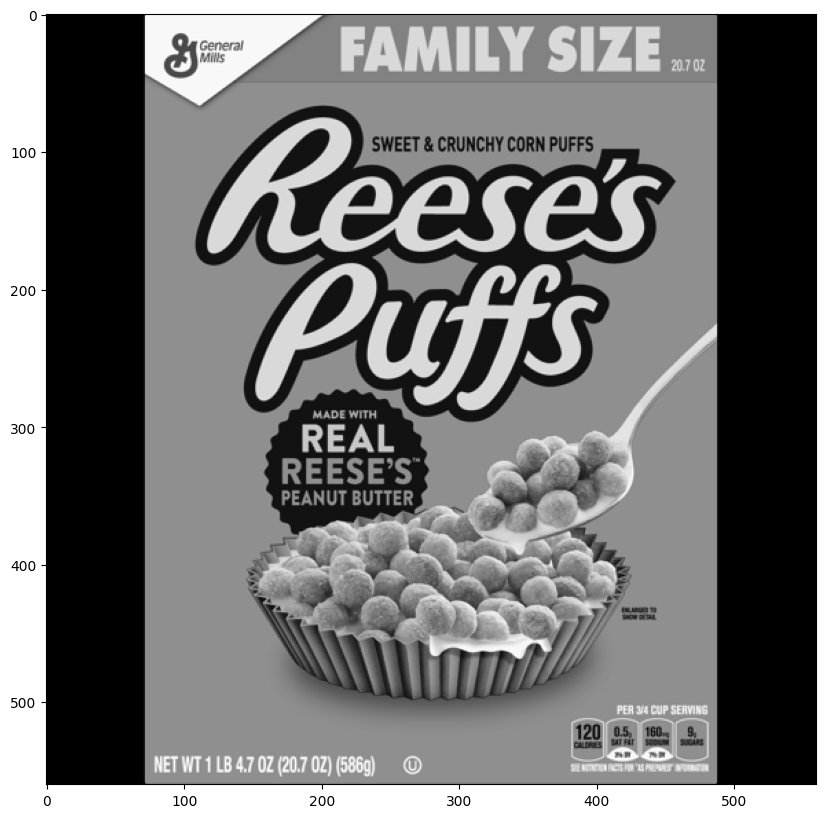

In [50]:
display(reeses)

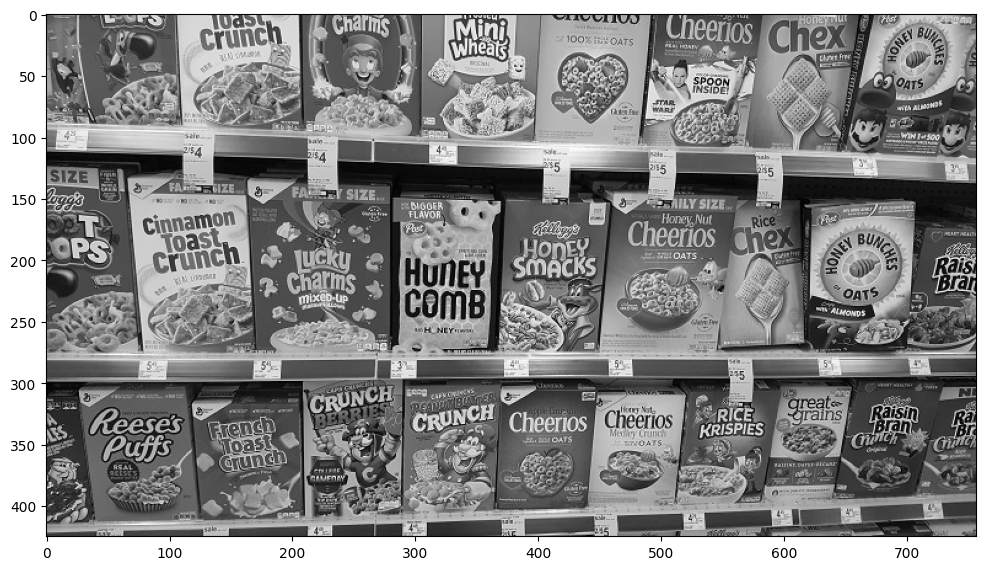

In [51]:
cereals = cv2.imread("Computer-Vision-with-Python\DATA\many_cereals.jpg",0)
display(cereals)

In [52]:
orb = cv2.ORB_create()  #This creates an ORB Object

In [53]:
# These lines detect the features and compute them and return KeyPoints and Descriptors as a tuple

kp1, dsc1 = orb.detectAndCompute(reeses,None)        
kp2, dsc2 = orb.detectAndCompute(cereals,None)

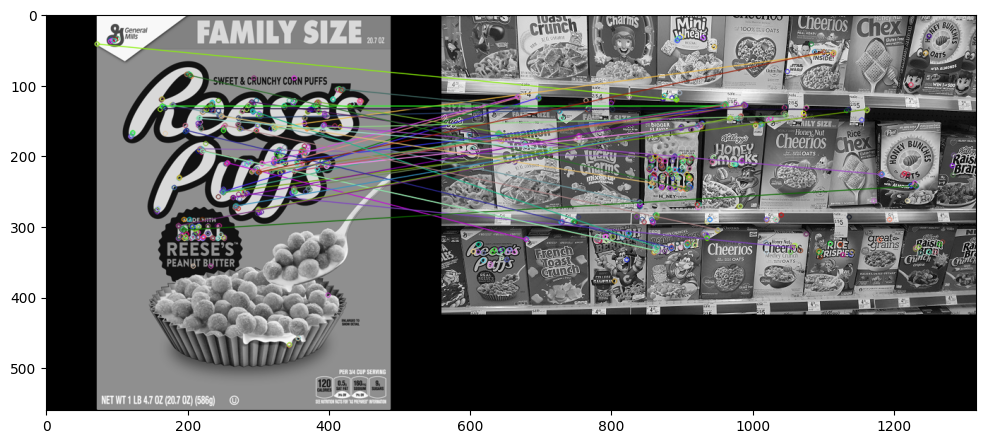

In [54]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING,crossCheck= True)       # Creating a BFMatcher object
matches = bf.match(dsc1,dsc2)                               # Matching the descriptors of both the objects
matches = sorted(matches, key = lambda x:x.distance)        # Sorting the sequence of matches. 

img3 = cv2.drawMatches(reeses,kp1,cereals,kp2,matches[:40],None) # Drawing the matches (Slicing of matches parameters can be done too)
display(img3)




In [55]:
sift = cv2.SIFT_create()


In [56]:
kp1, des1 = sift.detectAndCompute(reeses,None)
kp2, des2 = sift.detectAndCompute(cereals,None)

In [57]:
bf = cv2.BFMatcher()

In [58]:
matches = bf.knnMatch(des1,des2, k= 2)

In [59]:
matches

((< cv2.DMatch 0000024D32BF6490>, < cv2.DMatch 0000024D32ECBA50>),
 (< cv2.DMatch 0000024D32DF03B0>, < cv2.DMatch 0000024D32DF0A70>),
 (< cv2.DMatch 0000024D45C52230>, < cv2.DMatch 0000024D45C52250>),
 (< cv2.DMatch 0000024D45C52D90>, < cv2.DMatch 0000024D45C53CD0>),
 (< cv2.DMatch 0000024D45C51EB0>, < cv2.DMatch 0000024D45C53B10>),
 (< cv2.DMatch 0000024D45C52790>, < cv2.DMatch 0000024D45C53CB0>),
 (< cv2.DMatch 0000024D45C501B0>, < cv2.DMatch 0000024D45C9F9D0>),
 (< cv2.DMatch 0000024D45C9FA50>, < cv2.DMatch 0000024D45C9C890>),
 (< cv2.DMatch 0000024D45C9C9B0>, < cv2.DMatch 0000024D45C9ECF0>),
 (< cv2.DMatch 0000024D45C9F050>, < cv2.DMatch 0000024D45C9C970>),
 (< cv2.DMatch 0000024D45C9C9F0>, < cv2.DMatch 0000024D45C9DE50>),
 (< cv2.DMatch 0000024D45C9D4D0>, < cv2.DMatch 0000024D45C9C8B0>),
 (< cv2.DMatch 0000024D45C9D6B0>, < cv2.DMatch 0000024D45C9CAB0>),
 (< cv2.DMatch 0000024D45C9D390>, < cv2.DMatch 0000024D45C9C6F0>),
 (< cv2.DMatch 0000024D45C9C690>, < cv2.DMatch 0000024D45C9CA1

In [60]:
good_matches = []

In [61]:
for match1, match2 in matches:
    if match1.distance < 0.75*match2.distance:
        good_matches.append(match1)

In [62]:
good_matches

[< cv2.DMatch 0000024D32BF6490>,
 < cv2.DMatch 0000024D45C9D1B0>,
 < cv2.DMatch 0000024D32DFC2D0>,
 < cv2.DMatch 0000024D32DFC310>,
 < cv2.DMatch 0000024D32DFC510>,
 < cv2.DMatch 0000024D32DFCB10>,
 < cv2.DMatch 0000024D32DFCE10>,
 < cv2.DMatch 0000024D32DFCF90>,
 < cv2.DMatch 0000024D32DFD310>,
 < cv2.DMatch 0000024D32DFD550>,
 < cv2.DMatch 0000024D32DFD910>,
 < cv2.DMatch 0000024D32DFDA10>,
 < cv2.DMatch 0000024D32DFEC90>,
 < cv2.DMatch 0000024D32DFECD0>,
 < cv2.DMatch 0000024D32DFEDD0>,
 < cv2.DMatch 0000024D32DFFB50>,
 < cv2.DMatch 0000024D45CDC510>,
 < cv2.DMatch 0000024D45CDC5D0>,
 < cv2.DMatch 0000024D45CDC690>,
 < cv2.DMatch 0000024D45CDCF10>,
 < cv2.DMatch 0000024D45CDD050>,
 < cv2.DMatch 0000024D45CDE150>,
 < cv2.DMatch 0000024D45CDE290>,
 < cv2.DMatch 0000024D45CDE2D0>,
 < cv2.DMatch 0000024D45CDE490>,
 < cv2.DMatch 0000024D45CDE4D0>,
 < cv2.DMatch 0000024D45CDF6D0>,
 < cv2.DMatch 0000024D45CDF850>,
 < cv2.DMatch 0000024D45CDF890>,
 < cv2.DMatch 0000024D45CDFE50>,
 < cv2.DMa

In [63]:
print("Count of all the brute force matches are: {}".format(len(matches)))
print("Count of all good matches among the brute force matches are: {}".format(len(good_matches)))

Count of all the brute force matches are: 1501
Count of all good matches among the brute force matches are: 79


In [80]:
#  Let's draw the images and the matches

res = cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,[good_matches],None,flags=2)

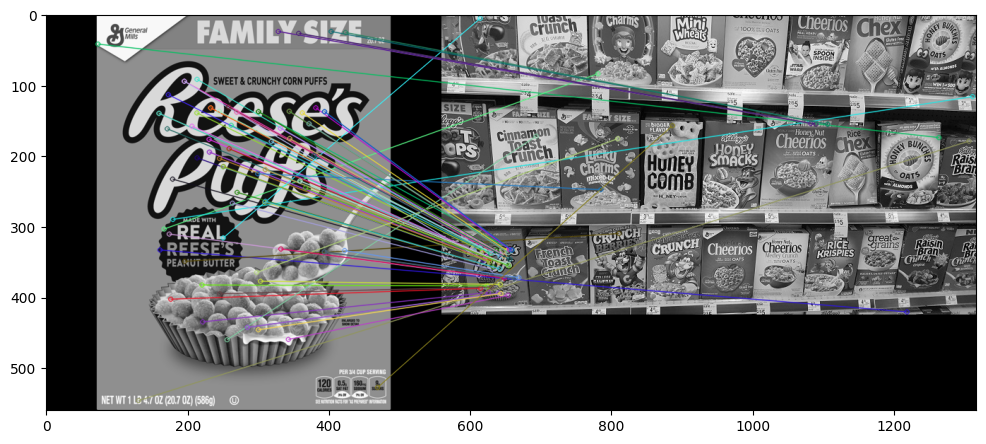

In [81]:
display(res)